## Final Project Submission

Please fill out:
* Student name: Ryan Keats
* Student pace: self paced / part time / full time
* Scheduled project review date/time: July 2nd, 11:59pm
* Instructor name: Hardik Idnani
* Blog post URL:


In [1]:
# Imported any libraries to get started and that may help my coding along the way
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from statsmodels.formula.api import ols

In [2]:
# Loaded the original dataframe 
df1 = pd.read_csv("data/kc_house_data.csv")
# Set the display format for the easier reading of larger numbers
pd.options.display.float_format = '{:,.0f}'.format
# Displaying .head() function which returns the first 5 rows of the dataframe 
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900",3,1,1180,5650,1,NaN,0,...,7,1180,0.0,1955,0,98178,48,-122,1340,5650
1,6414100192,12/9/2014,"538,000",3,2,2570,7242,2,0,0,...,7,2170,400.0,1951,"1,991",98125,48,-122,1690,7639
2,5631500400,2/25/2015,"180,000",2,1,770,10000,1,0,0,...,6,770,0.0,1933,NaN,98028,48,-122,2720,8062
3,2487200875,12/9/2014,"604,000",4,3,1960,5000,1,0,0,...,7,1050,910.0,1965,0,98136,48,-122,1360,5000
4,1954400510,2/18/2015,"510,000",3,2,1680,8080,1,0,0,...,8,1680,0.0,1987,0,98074,48,-122,1800,7503


In [3]:
# Sorted the 'price' column from highest to lowest
sorted_df1 = df1.sort_values('price', ascending=False)
# Displaying .head() function
sorted_df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,"7,700,000",6,8,12050,27600,2,0,3,...,13,8570,3480.0,1910,"1,987",98102,48,-122,3940,8800
3910,9808700762,6/11/2014,"7,060,000",5,4,10040,37325,2,1,2,...,11,7680,2360.0,1940,"2,001",98004,48,-122,3930,25449
9245,9208900037,9/19/2014,"6,890,000",6,8,9890,31374,2,0,4,...,13,8860,1030.0,2001,0,98039,48,-122,4540,42730
4407,2470100110,8/4/2014,"5,570,000",5,6,9200,35069,2,0,0,...,13,6200,3000.0,2001,NaN,98039,48,-122,3560,24345
1446,8907500070,4/13/2015,"5,350,000",5,5,8000,23985,2,0,4,...,12,6720,1280.0,2009,0,98004,48,-122,4600,21750


In [4]:
# Returns each column in the original df1
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Retruns the data types of each column from the original df1
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# Returns the count of each unique values for each column from the original dataframe 
df1.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [7]:
# Returns comprehensive information of the original df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
# Checking for any duplicated data from the original dataframe 
duplicates = df1.duplicated()
if duplicates.any():
    print("There are duplicated values in the DataFrame.")
else:
    print("There are no duplicated values in the DataFrame.")
print(duplicates.value_counts())
# Count the number of duplicate rows
duplicate_count = df1.duplicated().sum()
# Display the count
print(f"Number of duplicate rows: {duplicate_count}")

There are no duplicated values in the DataFrame.
False    21597
dtype: int64
Number of duplicate rows: 0


In [9]:
# Returns the presence of missing values (NaN) as a boolean dataframe 
# Also displaying .head() function 
df1.isna().head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
# Returns a count of the missing values (NaN) in each column of the original DataFrame
df1.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
# Returns a descriptive analysis of the original dataframe
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597","21,597","21,597","21,597","21,597","21,597","21,597","19,221","21,534","21,597","21,597","21,597","21,597","17,755","21,597","21,597","21,597","21,597","21,597"
mean,"4,580,474,288","540,297",3,2,"2,080","15,099",1,0,0,3,8,"1,789","1,971",84,"98,078",48,-122,"1,987","12,758"
std,"2,876,735,716","367,368",1,1,918,"41,413",1,0,1,1,1,828,29,400,54,0,0,685,"27,274"
min,"1,000,102","78,000",1,0,370,520,1,0,0,1,3,370,"1,900",0,"98,001",47,-123,399,651
25%,"2,123,049,175","322,000",3,2,"1,430","5,040",1,0,0,3,7,"1,190","1,951",0,"98,033",47,-122,"1,490","5,100"
50%,"3,904,930,410","450,000",3,2,"1,910","7,618",2,0,0,3,7,"1,560","1,975",0,"98,065",48,-122,"1,840","7,620"
75%,"7,308,900,490","645,000",4,2,"2,550","10,685",2,0,0,4,8,"2,210","1,997",0,"98,118",48,-122,"2,360","10,083"
max,"9,900,000,190","7,700,000",33,8,"13,540","1,651,359",4,1,4,5,13,"9,410","2,015","2,015","98,199",48,-121,"6,210","871,200"


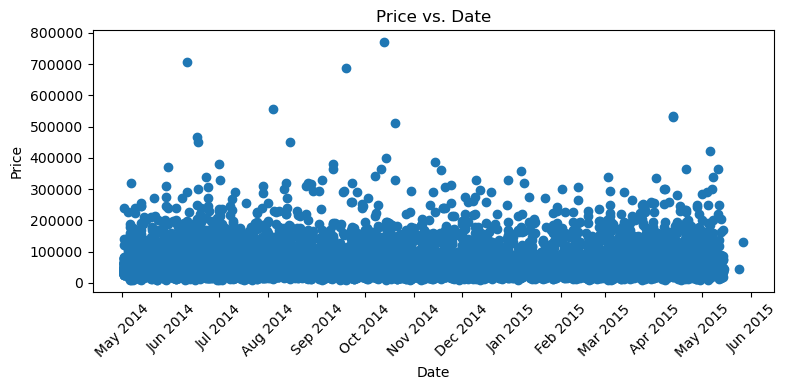

In [12]:
# Loaded the original dataframe and adjusted the price column 
df1 = pd.read_csv('data/kc_house_data.csv')
df1['price'] = df1['price'] / 10
# Converted the date column to datetime format
df1['date'] = pd.to_datetime(df1['date'])
# Created the scatter plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(df1['date'], df1['price'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Price vs. Date')
# Set x-axis tick locator and format
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

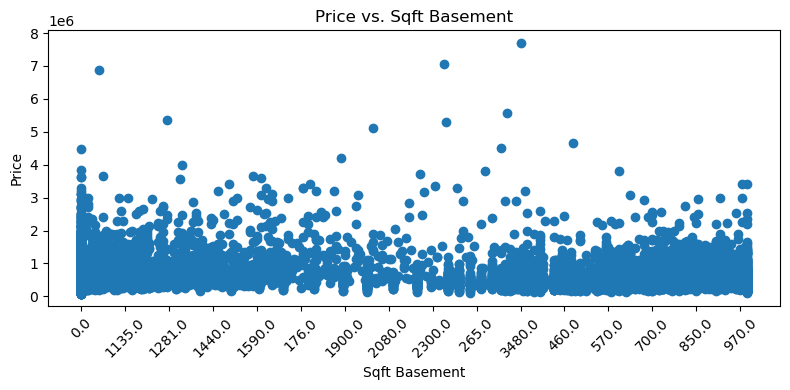

In [13]:
# Loaded the original dataframe & sort values from sqft_basement
df1 = pd.read_csv('data/kc_house_data.csv')
df1_sorted = df1.sort_values('sqft_basement')
# Create the scatter plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(df1_sorted['sqft_basement'], df1_sorted['price'])
ax.set_xlabel('Sqft Basement')
ax.set_ylabel('Price')
ax.set_title('Price vs. Sqft Basement')
# Set the number of desired intervals
num_intervals = 22
# Set x-axis tick locator for the desired number of intervals
ax.xaxis.set_major_locator(ticker.MaxNLocator(num_intervals))
# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

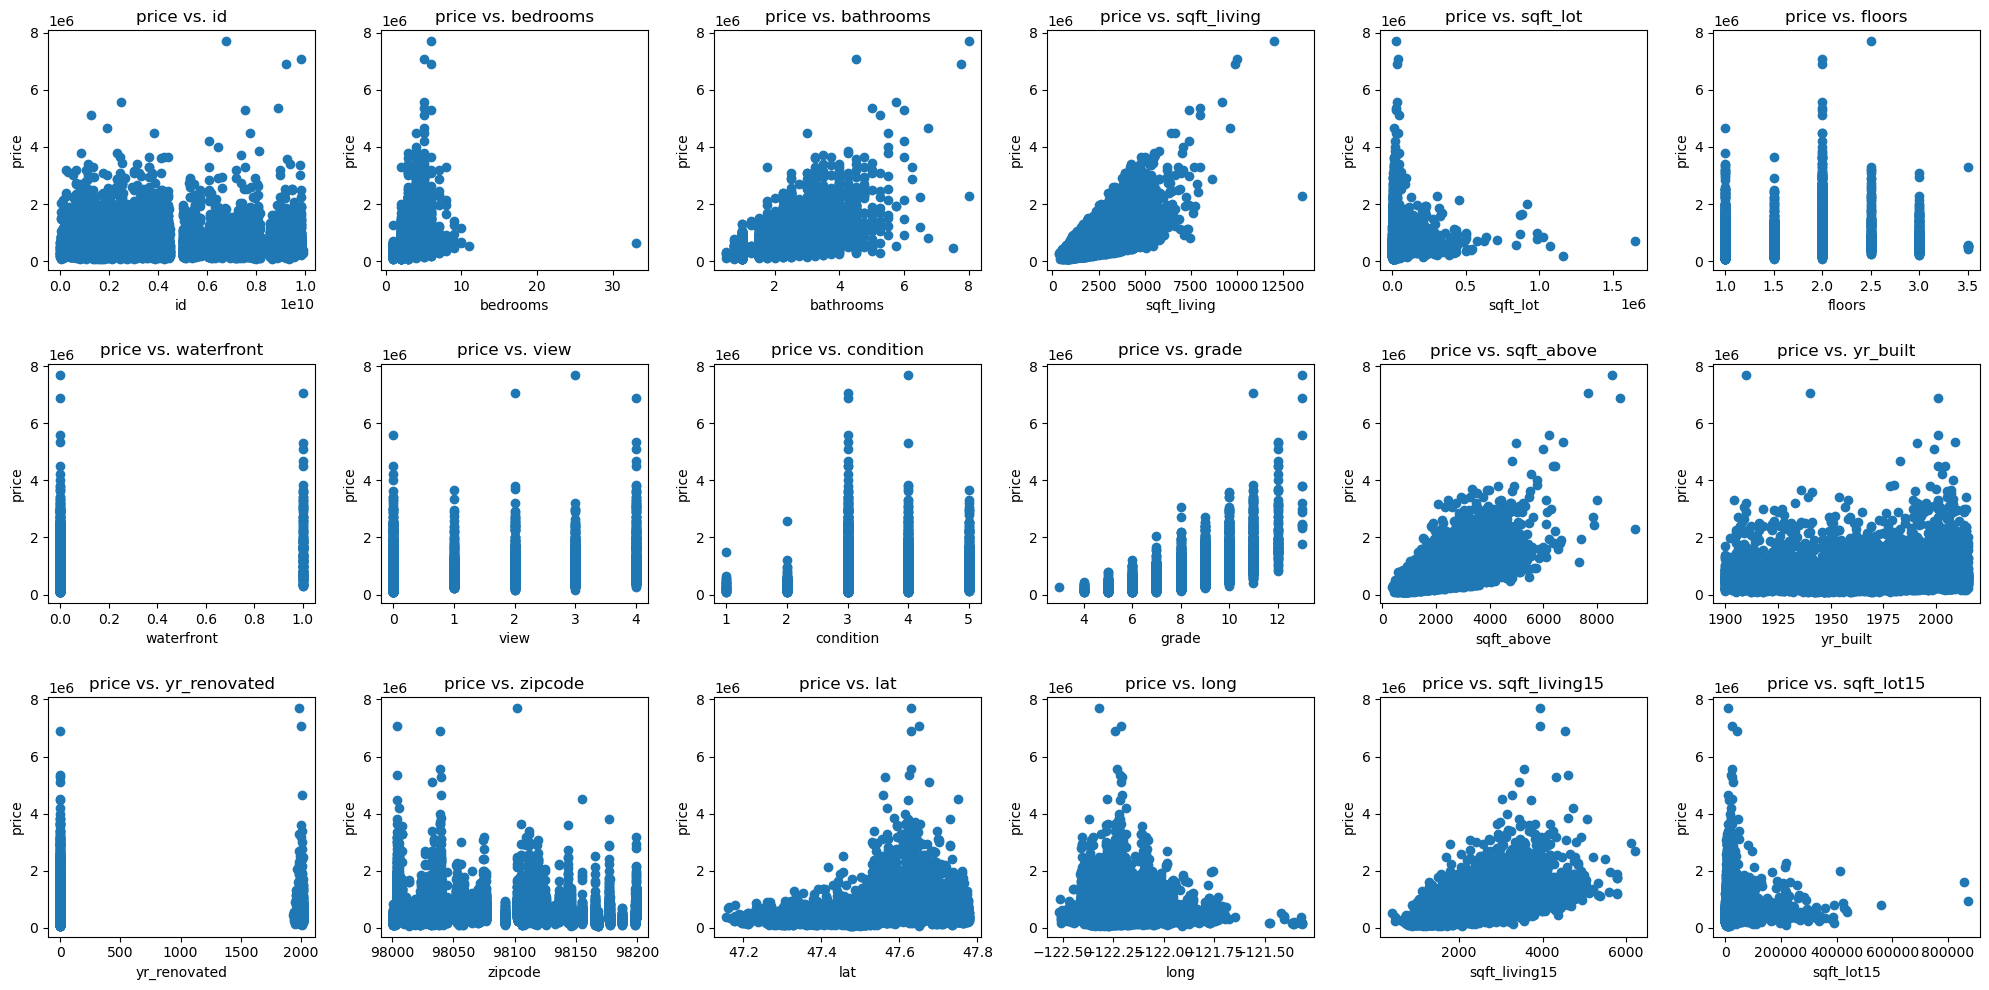

In [14]:
# Loaded the original dataframe
df1 = pd.read_csv('data/kc_house_data.csv')
# Set my Dependent variable
dependent_variable = 'price'
# Independent variables (I have removed 'date' & 'sqft_basement' as they were not readable on the axis of the plots)
independent_variables = ['id', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 
                         'waterfront', 'view', 'condition','grade', 'sqft_above', 'yr_built',
                         'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15','sqft_lot15']
# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 10))
axes = axes.flatten()
# Create scatter plots for each independent variable
for i, independent_var in enumerate(independent_variables):
    axes[i].scatter(df1[independent_var], df1[dependent_variable])
    axes[i].set_xlabel(independent_var)
    axes[i].set_ylabel(dependent_variable)
    axes[i].set_title(f'{dependent_variable} vs. {independent_var}')
# Adjusted spacing between subplots
fig.tight_layout()
# Display the plots
plt.show()

In [15]:
# Cleaning dataframe by removing unwanted columns, removing NaN & outliers 
# Load the original dataset
df1 = pd.read_csv('data/kc_house_data.csv')
# Replace '?' values with NaN
df1.replace('?', np.nan, inplace=True)
# Drop rows with missing values
df1.dropna(inplace=True)
# Specify the columns to remove
cols_to_remove = ['id','date', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 
                  'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','yr_built']
# Drop the specified columns
df2 = df1.drop(columns=cols_to_remove)
# Specify the new filename
new_filename = 'data/cleaned_data.csv'
# Save the cleaned dataset as the new CSV file
df2.to_csv(new_filename, index=False)
# Display the updated dataframe after removing columns and outliers
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
1,"538,000",3,2,2570,7242,2,3,7
3,"604,000",4,3,1960,5000,1,5,7
4,"510,000",3,2,1680,8080,1,3,8
5,"1,230,000",4,4,5420,101930,1,3,11
8,"229,500",3,1,1780,7470,1,3,7


In [16]:
# Returns each column from the updated df2
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade'],
      dtype='object')

In [17]:
# Returns shape of the updated df2
df2.shape

(15429, 8)

In [18]:
# Returns the data types of each column from the updated df2
df2.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
condition        int64
grade            int64
dtype: object

In [19]:
# Returns the count of each unique value for each column from the updated df2
df2.nunique()

price          3006
bedrooms         12
bathrooms        27
sqft_living     905
sqft_lot       7805
floors            6
condition         5
grade            11
dtype: int64

In [20]:
# Returns comprehensive information of the updated df2_cleaned
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        15429 non-null  float64
 1   bedrooms     15429 non-null  int64  
 2   bathrooms    15429 non-null  float64
 3   sqft_living  15429 non-null  int64  
 4   sqft_lot     15429 non-null  int64  
 5   floors       15429 non-null  float64
 6   condition    15429 non-null  int64  
 7   grade        15429 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.1 MB


In [21]:
# Returns a descriptive analysis of the updated df2
df2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
count,"15,429","15,429","15,429","15,429","15,429","15,429","15,429","15,429"
mean,"541,498",3,2,"2,086","15,286",1,3,8
std,"373,022",1,1,920,"41,997",1,1,1
min,"82,000",1,0,370,520,1,1,3
25%,"320,000",3,2,"1,430","5,050",1,3,7
50%,"450,000",3,2,"1,920","7,620",2,3,7
75%,"643,500",4,2,"2,550","10,720",2,4,8
max,"7,700,000",33,8,"13,540","1,651,359",4,5,13


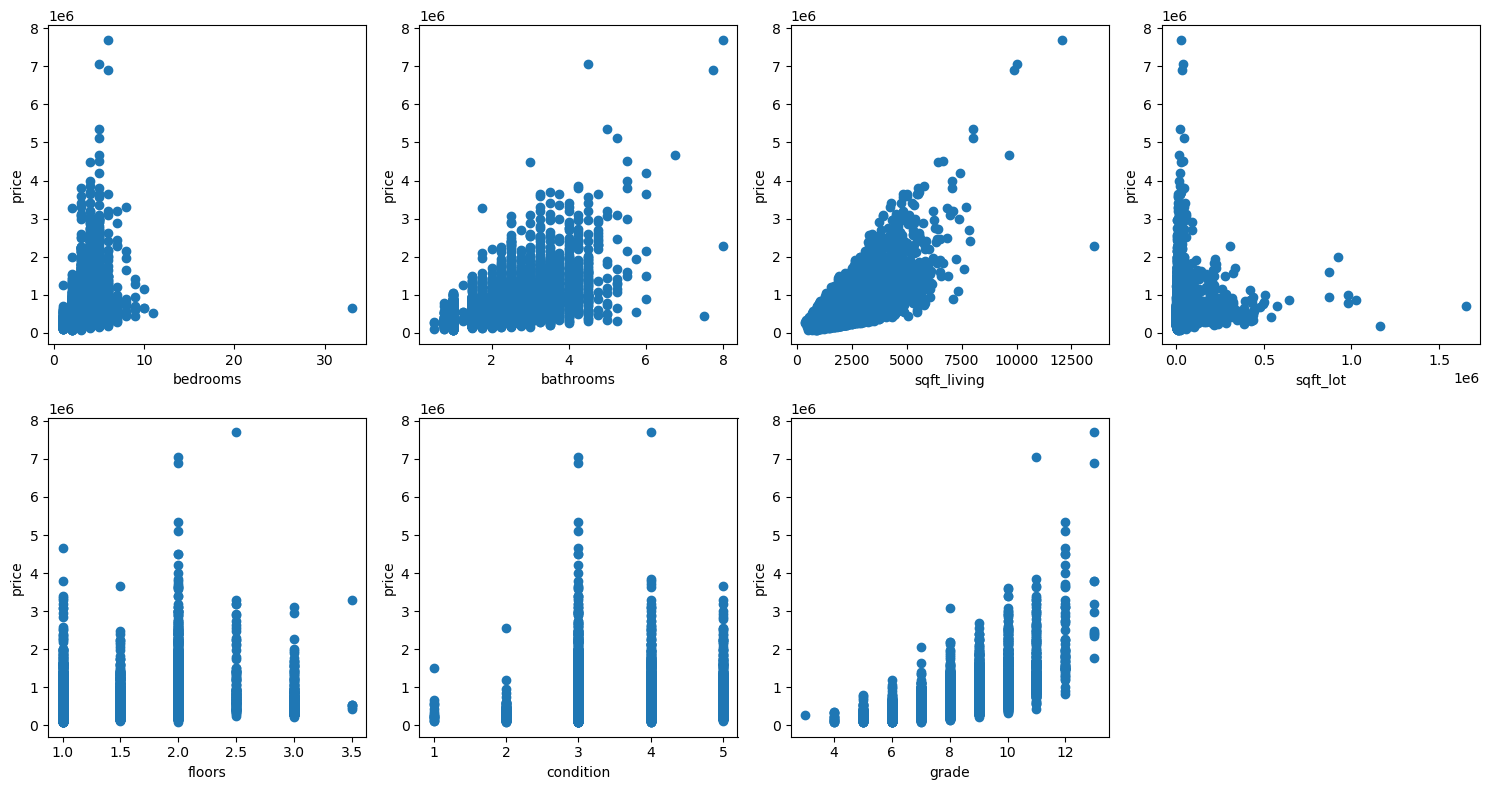

In [22]:
# Build scatter plots for each independent variable
ind_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade']
dep_var = 'price'
# Set the size of the overall figure
plt.figure(figsize=(15, 8))  
for i, var in enumerate(ind_vars, 1):
    plt.subplot(2, 4, i)
    plt.scatter(df2[var], df2[dep_var])
    plt.xlabel(var)
    plt.ylabel(dep_var)
# Adjust the spacing between subplots
plt.tight_layout()
# Display the plots 
plt.show()

In [23]:
# Recording my observations on linearity here 

# Bathrooms & sqft_living are the closest to being a good features at this stage in showing any resemblance 
# of a prositive linear relationship.

# Bedrooms & sqft_lot are the next closest to show any resemblance of a positive linear relationship 
# but still have far too much variance and outliers to suggest either are good predictors yet. 

# Floors, grade & condition variables generate parallel lines in a scatter plot which suggest 
# the presence of a non linear relationship or interaction between variables.
# Indicating a violation of the linearity assumption in regression analysis.

In [24]:
# Loaded my dataframe
df2 = pd.read_csv('data/cleaned_data.csv')
# Define the dependent variable
y = df2['price']
# Define the independent variables 
X = df2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade']]

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)
# Create the OLS model
model = sm.OLS(y, X)
# Fit the model to the data
results = model.fit()
# Display the summary of the regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     2804.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:41:58   Log-Likelihood:            -2.1350e+05
No. Observations:               15429   AIC:                         4.270e+05
Df Residuals:                   15421   BIC:                         4.271e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.066e+05    2.2e+04    -32.150      0.000    -7.5e+05   -6.64e+05
bedrooms    -4.731e+04   2699.366    -17.526      0.000   -5.26e+04    -4.2e+04
bathrooms   -1.178e+04   4388.222     -2.685      0.007   -2.04e+04   -3179.229
sqft_living   232.6165      4.318     53.867      0.000     224.152     241.081
sqft_lot       -0.3396      0.048     -7.007      0.000      -0.435      -0.245
floors      -2.256e+04   4539.976     -4.968      0.000   -3.15e+04   -1.37e+04
condition    6.142e+04   3186.455     19.274      0.000    5.52e+04    6.77e+04
grade        1.014e+05   2837.149     35.745      0.000    9.59e+04    1.07e+05
==============================================================================
Omnibus:                    12215.448   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           773399.758
Skew:                           3.319   Prob(JB):                         0.00
Kurtosis:                      37.044   Cond. No.                     4.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [26]:
# Coefficients
linreg.coef_

array([ 0.00000000e+00, -4.73077945e+04, -1.17806617e+04,  2.32616536e+02,
       -3.39591337e-01, -2.25556164e+04,  6.14170699e+04,  1.01414464e+05])

In [27]:
# Intercept
linreg.intercept_

-706644.8563373213

In [28]:
# My documentation of the coefficients on my baseline model 

# Each additional bedroom is associated with a decrease in price by approximately $47,310.
# Each additional bathroom is associated with a decrease in price by approximately $11,780.
# A one unit (square feet) increase in the living is associated with an increase in price by approximately $232.62.
# A one unit (square feet) increase in the lot size is associated with a decrease in price by approximately $0.34.
# Each additional floor is associated with a decrease in price by approximately $22,560.
# A one unit increase in the condition rating is associated with an increase in price by approximately $61,420.
# A one unit increase in the grade rating is associated with an increase in price by approximately $101,400.

# The unrealistic or contradictory coefficients in my baseline model indicate the need for improvement. 
# By refining the model through additonal steps and iterations a more accurate coefficient estimate can be obtained 
# to align with the true relationships between the variables. 

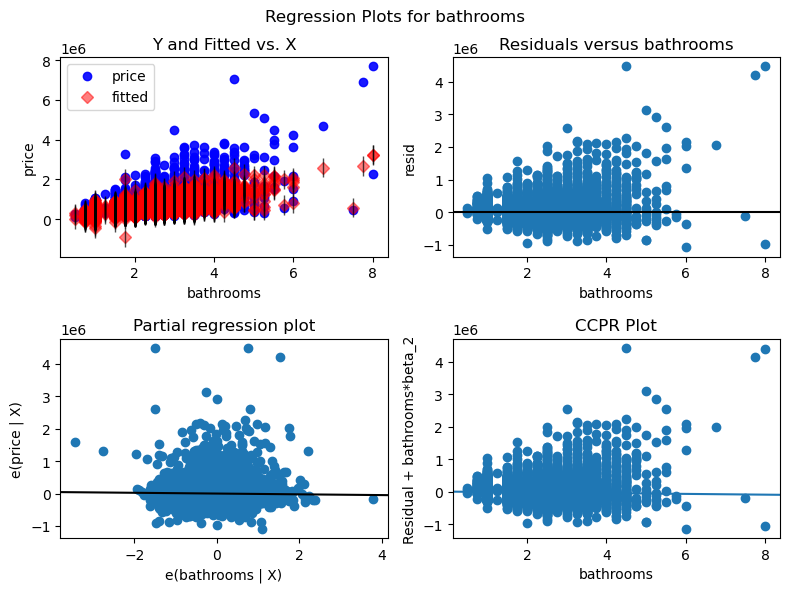

In [29]:
# Create the figure
fig = plt.figure(figsize=(8, 6))
# Plot the regression results for the 'bathrooms' variable
sm.graphics.plot_regress_exog(results, 'bathrooms', fig=fig)
# Display the plot
plt.show()

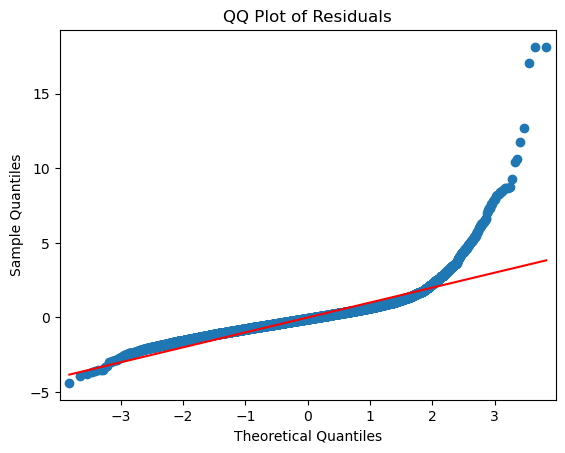

In [30]:
# Load your dataset into a pandas DataFrame
df2 = pd.read_csv('data/cleaned_data.csv')
# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
# Create the QQ plot for residuals
sm.qqplot(results.resid, line='s', fit=True)
# Set plot title and labels
plt.title("QQ Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
# Display the plot
plt.show()

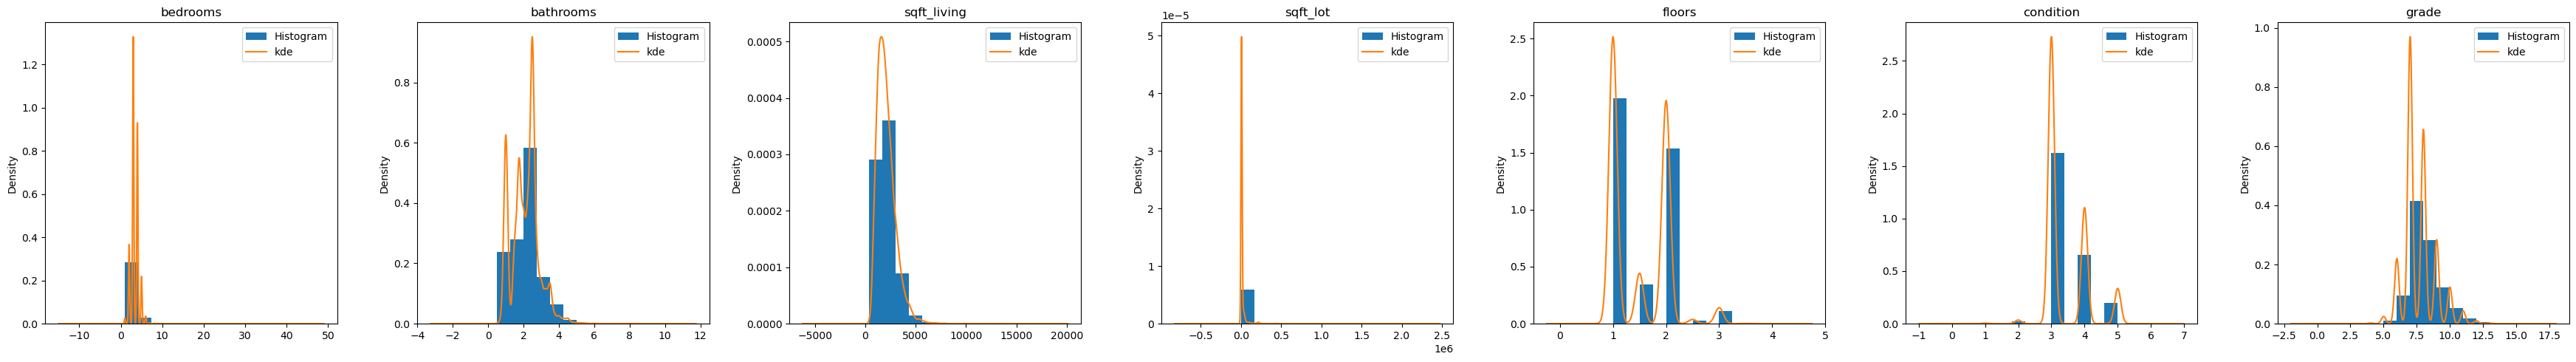

In [31]:
# Load the dataframe
df2 = pd.read_csv('data/cleaned_data.csv')
# Define the independent variables
independent_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade']
# Create subplots for each independent variable
fig, axs = plt.subplots(1, len(independent_variables), figsize=(5 * len(independent_variables), 5))
# Iterate over each independent variable
for i, var in enumerate(independent_variables):
    # Plot histogram with kde
    ax = axs[i]
    df2[var].plot.hist(density=True, ax=ax, label='Histogram')
    df2[var].plot.kde(ax=ax, label='kde')
    ax.legend()
    ax.set_title(var)
# Adjust spacing of subplots
plt.tight_layout()
# Display the plots
plt.show()

In [32]:
# Recording my observations here 

# No variable is remotely close to displaying a normal distribution.
# We see different examples of major skews in all the predictors.
 
# One advantage of the observed large variances is that I have not yet removed the outliers, 
# which could be influencing the coefficients. The unusual coefficients I previously documented 
# are a positive outcome because they indicate that there is no normal distribution 
# for those unrealistic coefficients displayed in the baseline summary.

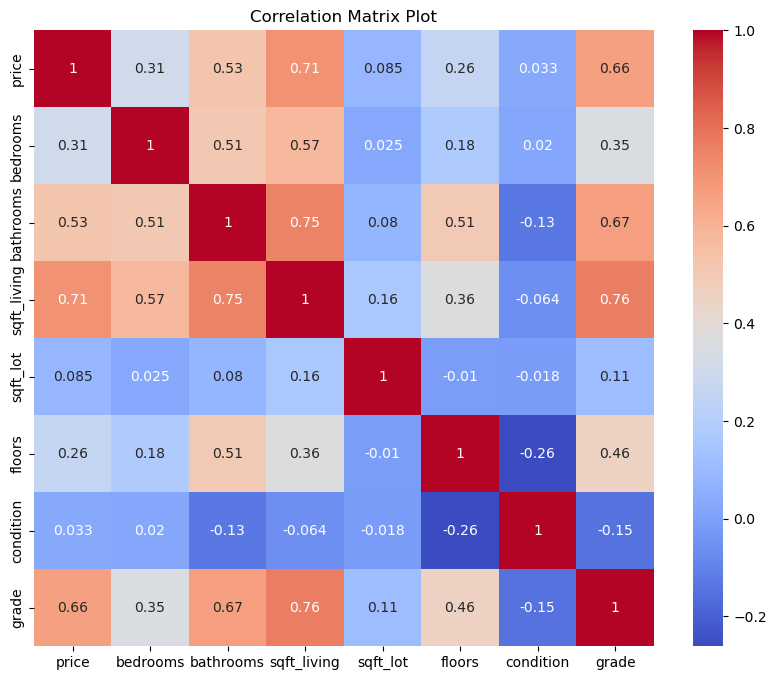

In [33]:
# Load your dataset into a pandas DataFrame
df2 = pd.read_csv('data/cleaned_data.csv')
# Compute the correlation matrix
correlation_matrix = df2.corr()
# Create a correlation matrix plot using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Plot')
plt.show()

In [34]:
# Loaded my dataframe
df2 = pd.read_csv('data/cleaned_data.csv')
# Define the threshold value for outlier removal
threshold = 3 
# Calculate z-scores for each column
z_scores = np.abs((df2 - df2.mean()) / df2.std())
# Remove rows with outlier values
df2_cleaned = df2[(z_scores < threshold).all(axis=1)]
# Remove zeros from the DataFrame
df2_cleaned = df2_cleaned.replace(0, pd.NA).dropna()
# Save the cleaned DataFrame to a new CSV file
df2_cleaned.to_csv('data/cleaned_data_outliers_removed.csv', index=False)
# Display cleaned dataframe 
df2_cleaned.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
0,"538,000",3,2,2570,7242,2,3,7
1,"604,000",4,3,1960,5000,1,5,7
2,"510,000",3,2,1680,8080,1,3,8
4,"229,500",3,1,1780,7470,1,3,7
5,"323,000",3,2,1890,6560,2,3,7


In [35]:
# I wanted to display comprehensive description of the cleaned dataframe 
df2_cleaned.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
count,"14,694","14,694","14,694","14,694","14,694","14,694","14,694","14,694"
mean,"500,991",3,2,"2,001","10,736",1,3,8
std,"253,648",1,1,778,"13,672",1,1,1
min,"82,000",1,0,370,520,1,2,5
25%,"317,000",3,2,"1,410","5,000",1,3,7
50%,"442,375",3,2,"1,880","7,500",1,3,7
75%,"620,000",4,2,"2,470","10,183",2,4,8
max,"1,660,000",6,4,"4,800","139,392",3,5,11


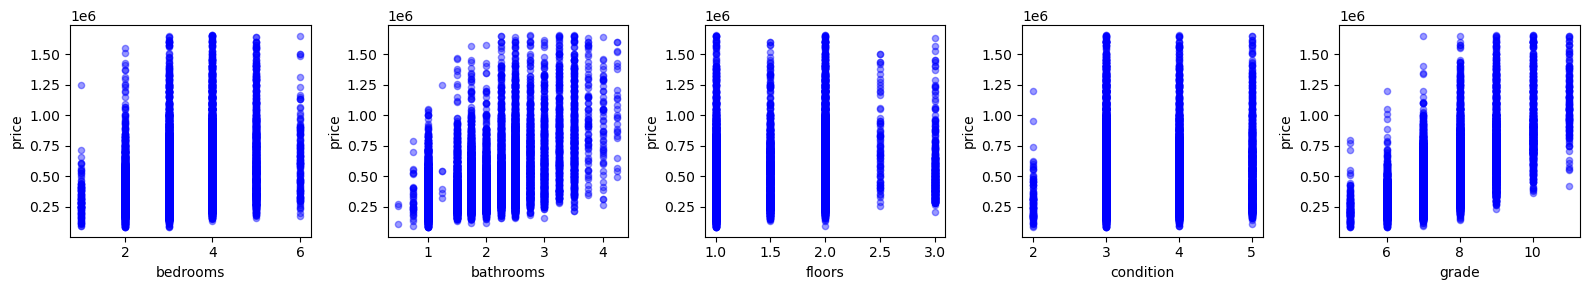

In [36]:
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))
for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors','condition','grade'], axes):
    df2_cleaned.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
plt.tight_layout()

In [37]:
df2_cleaned = pd.read_csv('data/cleaned_data_outliers_removed.csv')
# Create dummies for bedrooms
bedroom_dummies = pd.get_dummies(df2_cleaned['bedrooms'], prefix='bedroom')
# Create dummies for bathrooms
bathroom_dummies = pd.get_dummies(df2_cleaned['bathrooms'], prefix='bathroom')
# Concatenate the dummies with the original DataFrame
df_with_dummies = pd.concat([df2_cleaned, bedroom_dummies, bathroom_dummies], axis=1)

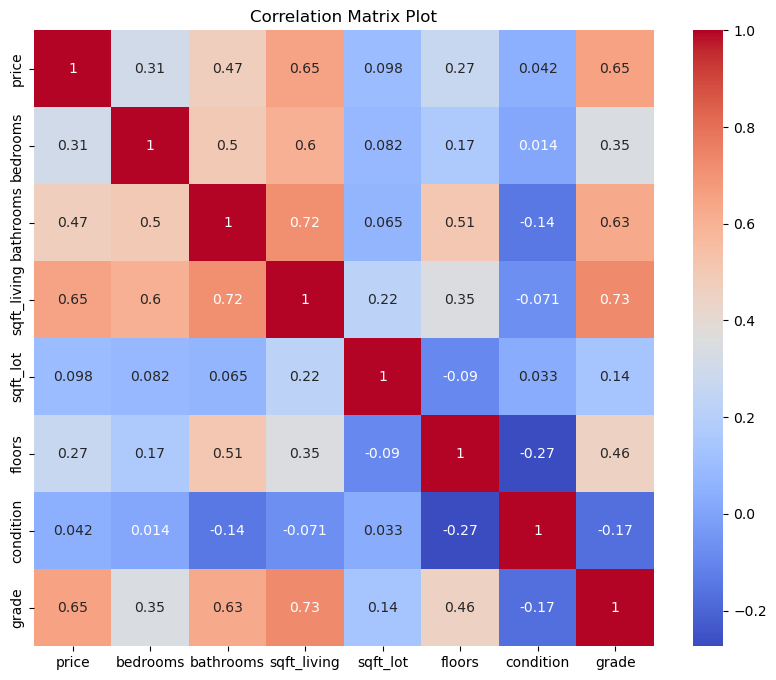

In [38]:
# Load your dataset into a pandas DataFrame
df2_cleaned = pd.read_csv('data/cleaned_data_outliers_removed.csv')
# Compute the correlation matrix
correlation_matrix = df2_cleaned.corr()
# Create a correlation matrix plot using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Plot')
plt.show()

In [39]:
columns_to_remove = ['bathroom_0.5', 'bathroom_0.75', 'bathroom_1.25', 'bathroom_1.5', 'bathroom_1.75',
                     'bathroom_2.25', 'bathroom_2.5', 'bathroom_2.75', 'bathroom_3.25', 'bathroom_3.5',
                     'bathroom_3.75', 'bathroom_4.25']
df2_cleaned = df_with_dummies.drop(columns=columns_to_remove)

In [40]:
# I removed these variables as they make no sense to my dataframe and not needed going forward. 
# I got these variables when I created my dummies and moving forward they are erelevant and unrealistic variables. 

In [41]:
# Log-transform the target variable
df_with_dummies['price_log'] = np.log(df_with_dummies['price'])
# Apply inverse transformation for predictions in the original scale
df_with_dummies['price_predictions'] = np.exp(df_with_dummies['price_log'])

In [42]:
df2_cleaned.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'bedroom_1', 'bedroom_2', 'bedroom_3',
       'bedroom_4', 'bedroom_5', 'bedroom_6', 'bathroom_1.0', 'bathroom_2.0',
       'bathroom_3.0', 'bathroom_4.0'],
      dtype='object')

In [43]:
import statsmodels.api as sm
predictor_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                     'floors','condition', 'grade','bedroom_1', 'bedroom_2', 
                     'bedroom_3', 'bedroom_4', 'bedroom_5', 'bedroom_6', 
                     'bathroom_1.0', 'bathroom_2.0', 'bathroom_3.0', 'bathroom_4.0']
target_column = 'price'
# Create the design matrix
X = df2_cleaned[predictor_columns]
y = df2_cleaned[target_column]
# Add constant to the design matrix
X = sm.add_constant(X)
# Create and fit the OLS model
model = sm.OLS(y, X)
results = model.fit()
# Display the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     1093.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:42:07   Log-Likelihood:            -1.9819e+05
No. Observations:               14694   AIC:                         3.964e+05
Df Residuals:                   14678   BIC:                         3.965e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.724e+05   1.11e+04    -33.638      0.000   -3.94e+05   -3.51e+05
bedrooms     -8.923e+04   2710.838    -32.915      0.000   -9.45e+04   -8.39e+04
bathrooms     2868.2036   4219.912      0.680      0.497   -5403.353    1.11e+04
sqft_living    143.4758      3.591     39.954      0.000     136.437     150.515
sqft_lot        -0.9643      0.111     -8.721      0.000      -1.181      -0.748
floors       -5055.6723   3356.614     -1.506      0.132   -1.16e+04    1523.713
condition     5.637e+04   2338.570     24.103      0.000    5.18e+04    6.09e+04
grade         1.041e+05   2152.019     48.391      0.000    9.99e+04    1.08e+05
bedroom_1    -2.092e+05   1.26e+04    -16.583      0.000   -2.34e+05   -1.84e+05
bedroom_2     -1.54e+05   6527.972    -23.596      0.000   -1.67e+05   -1.41e+05
bedroom_3     -1.33e+05   4585.141    -29.006      0.000   -1.42e+05   -1.24e+05
bedroom_4    -6.073e+04   4652.508    -13.053      0.000   -6.98e+04   -5.16e+04
bedroom_5     3.764e+04   6549.225      5.747      0.000    2.48e+04    5.05e+04
bedroom_6      1.47e+05   8863.412     16.580      0.000     1.3e+05    1.64e+05
bathroom_1.0  5.138e+04   5794.075      8.867      0.000       4e+04    6.27e+04
bathroom_2.0  2.411e+04   5244.663      4.598      0.000    1.38e+04    3.44e+04
bathroom_3.0   2.37e+04   8486.150      2.793      0.005    7067.881    4.03e+04
bathroom_4.0  5.679e+04   2.43e+04      2.338      0.019    9182.435    1.04e+05
==============================================================================
Omnibus:                     2580.706   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6384.052
Skew:                           0.981   Prob(JB):                         0.00
Kurtosis:                       5.565   Cond. No.                     2.75e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.89e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

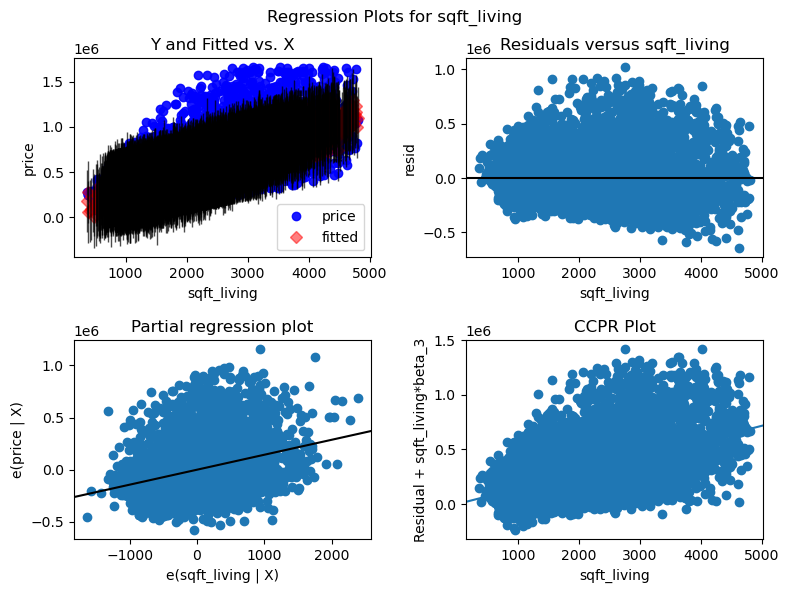

In [44]:
# Create the figure
fig = plt.figure(figsize=(8, 6))
# Plot the regression results for variable
sm.graphics.plot_regress_exog(results, 'sqft_living', fig=fig)
# Display the plot
plt.show()